In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

### Acerca del conjunto de datos
#### Contexto
Predecir la lluvia del día siguiente entrenando modelos de clasificación en la variable objetivo RainTomorrow.

#### Contenido
Este conjunto de datos contiene unos 10 años de observaciones meteorológicas diarias de muchos lugares de Australia.

RainTomorrow es la variable objetivo a predecir. Significa: ¿lloverá al día siguiente, Sí o No? Esta columna es Sí si la lluvia para ese día fue de 1mm o más.

Fuente y agradecimientos
Las observaciones proceden de numerosas estaciones meteorológicas. Las observaciones diarias están disponibles en http://www.bom.gov.au/climate/data.
Un ejemplo de las últimas observaciones meteorológicas en Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definiciones adaptadas de http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Fuente de los datos: http://www.bom.gov.au/climate/dwo/ y http://www.bom.gov.au/climate/data.

Copyright Commonwealth de Australia 2010, Oficina de Meteorología.

In [11]:
weather_data = pd.read_csv('https://raw.githubusercontent.com/sharonmaygua/rain_prediction/main/weatherAUS.csv')

<h2>Descripción de variables</h2>

- **Location**: Nombre común de la ubicación de la estación metereológica
- **MinTemp**: La temperatura mínima [°C]
- **MaxTemp**: La temperatura máxima [°C]
- **Rainfall**: La cantidad de lluvia registrada para el día [mm]
- **Evaporation**: Evaporación de Tanque Tipo Clase A en las 24 hr anteriores a las 9 de la mañana [mm]
- **Sunshine**: Número de horas de sol al día
- **WindGustDir**: Dirección de la racha de viento más fuerte en las 24 horas anteriores a medianoche
- **WindGustSpeed**: Velocidad (km/h) de la racha de viento más fuerte en las 24 horas anteriores a medianoche
- **WindDir9am**: Dirección del viento a las 9 am
- **WindDir3pm**: Dirección del viento a las 3 pm
- **WindSpeed9am**: Velocidad del viento (km/h) media de los 10 minutos anteriores a las 9 am
- **WindSpeed3pm**: Velocidad del viento (km/h) media de los 10 minutos anteriores a las 3 pm
- **Humidity9am**: Humedad (%) a las 9 am
- **Humidity3pm**: Humedad (%) a las 3 pm
- **Pressure9am**: Presión atmosférica (hPa) reducida al nivel medio del mar a las 9 am
- **Pressure3pm**: Presión atmosférica (hPa) reducida al nivel medio del mar a las 3 pm
- **Cloud9am**: Fracción de cielo oscurecido por nubes a las 9 de la mañana. Se mide en "oktas", que es una unidad de octavas. Registra cuántas octavas partes del cielo están cubiertas por nubes. Un 0 indica que el cielo está completamente despejado, mientras que un 8 indica que está completamente nublado.
- **Cloud3pm**: Fracción de cielo oscurecido por nubes (en "oktas": octavos) a las 3 pm. Véase Cloud9am para una descripción de los valores
- **Temp9am**: Temperatura (°C) a las 9 am
- **Temp3pm**: Temperatura (°C) a las 3 pm

- **RainToday**: Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9h es superior a 1 mm, en caso contrario 0
- **RainTomorrow**: La cantidad de lluvia del día siguiente en mm. Se utiliza para crear la variable de respuesta RainTomorrow. Una especie de medida del "riesgo".

In [12]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
weather_data.describe().round(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0
mean,12.2,23.2,2.4,5.5,7.6,40.0,14.0,18.7,68.9,51.5,1017.6,1015.3,4.4,4.5,17.0,21.7
std,6.4,7.1,8.5,4.2,3.8,13.6,8.9,8.8,19.0,20.8,7.1,7.0,2.9,2.7,6.5,6.9
min,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
25%,7.6,17.9,0.0,2.6,4.8,31.0,7.0,13.0,57.0,37.0,1012.9,1010.4,1.0,2.0,12.3,16.6
50%,12.0,22.6,0.0,4.8,8.4,39.0,13.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1
75%,16.9,28.2,0.8,7.4,10.6,48.0,19.0,24.0,83.0,66.0,1022.4,1020.0,7.0,7.0,21.6,26.4
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


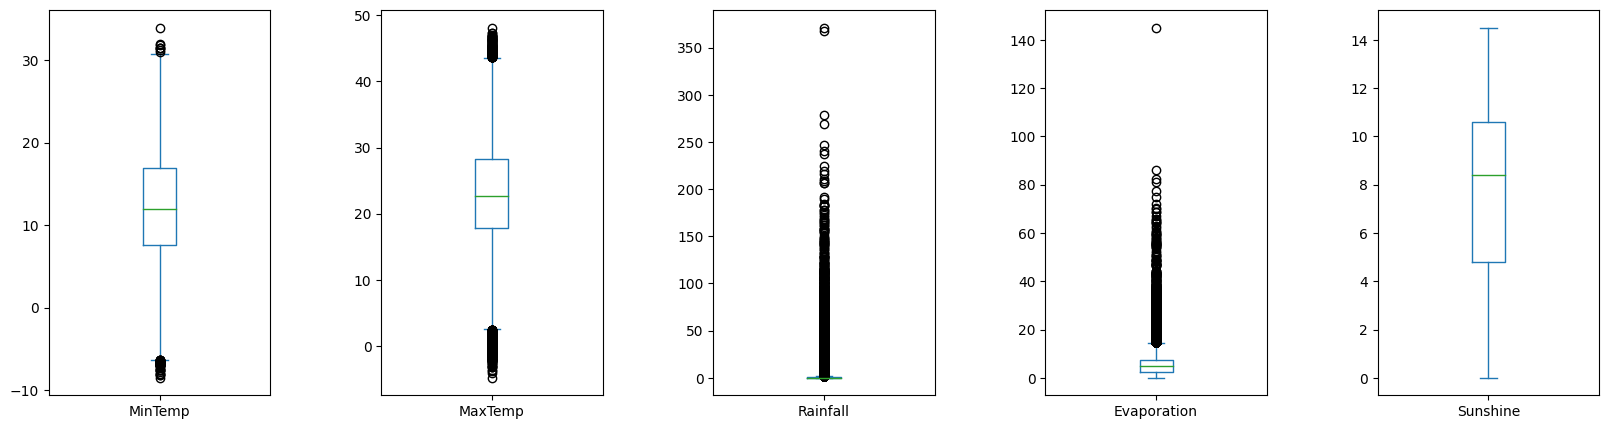

In [15]:
weather_data.iloc[:,:8].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,5)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

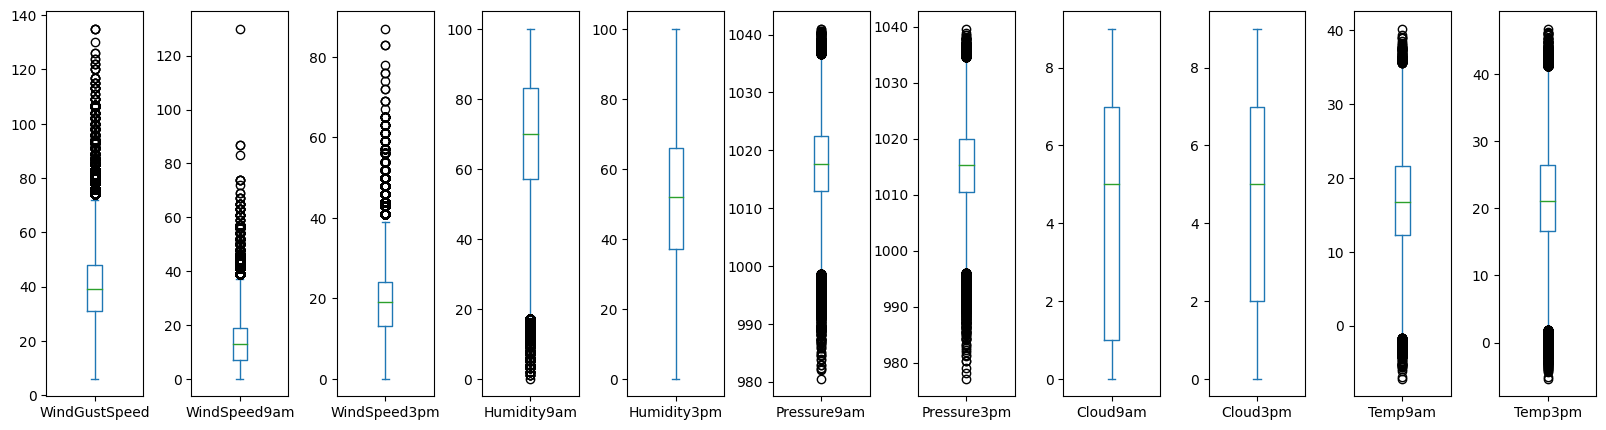

In [16]:
weather_data.iloc[:,8:].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,5)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

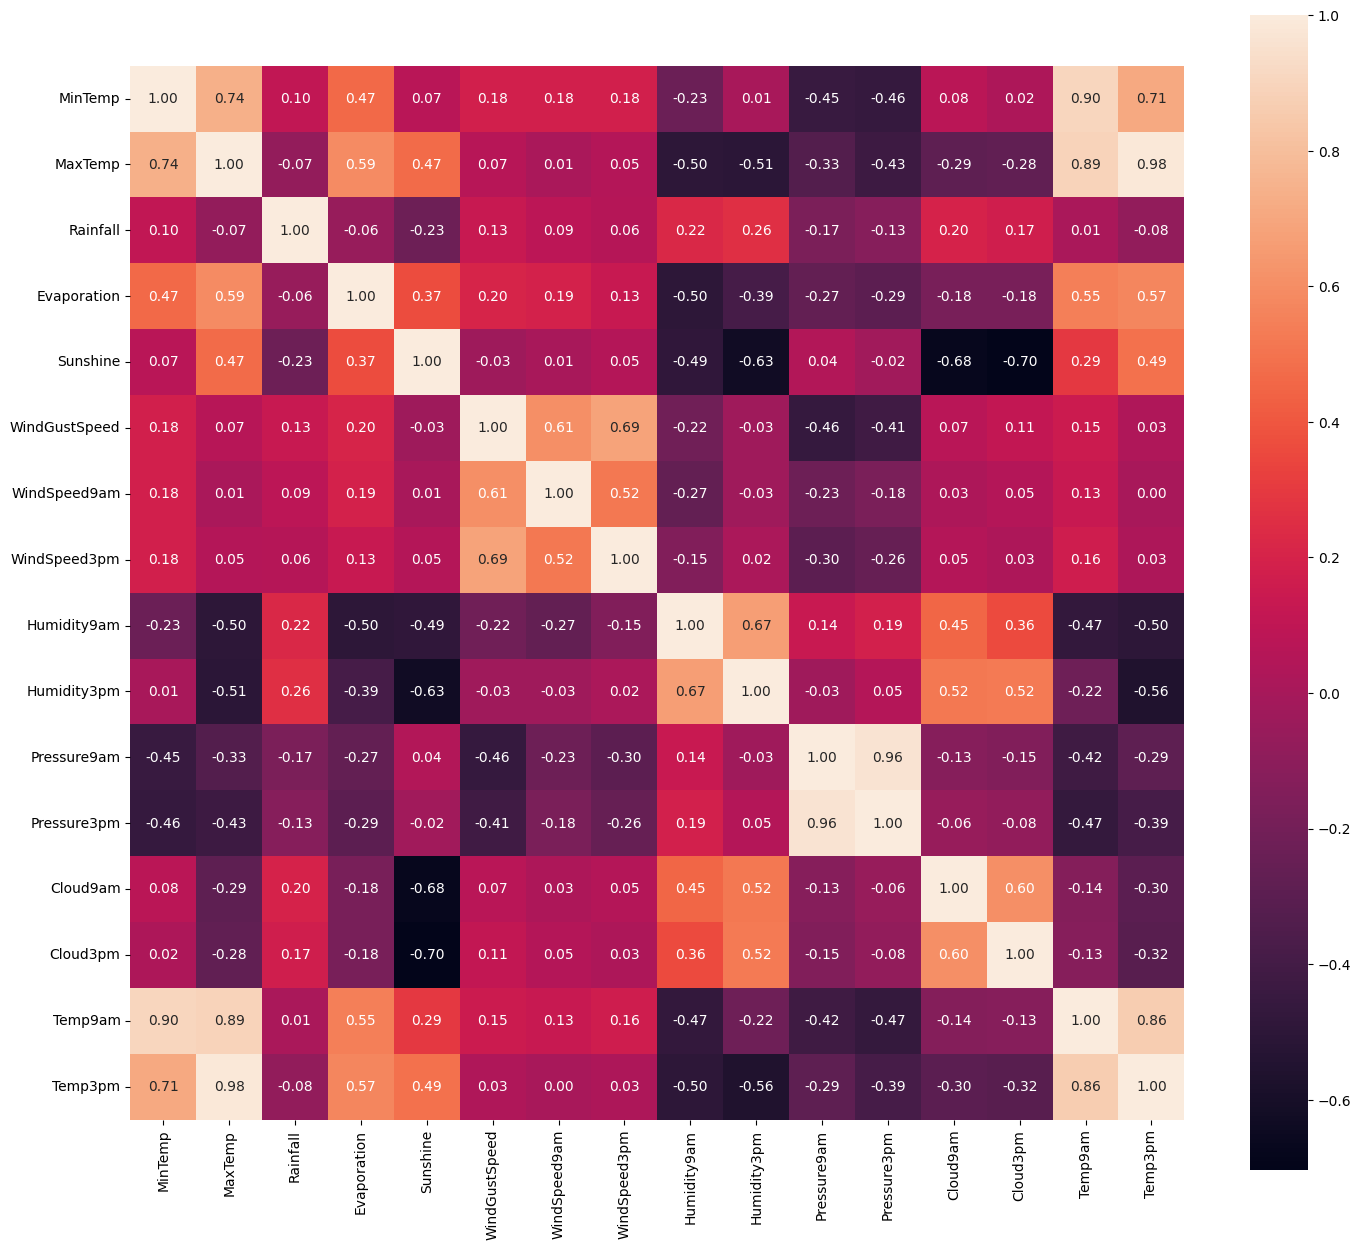

In [34]:
plt.figure(figsize=(17,15))
numerics = ['float64']
ax = sns.heatmap(weather_data.select_dtypes(include=numerics).corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<Axes: >

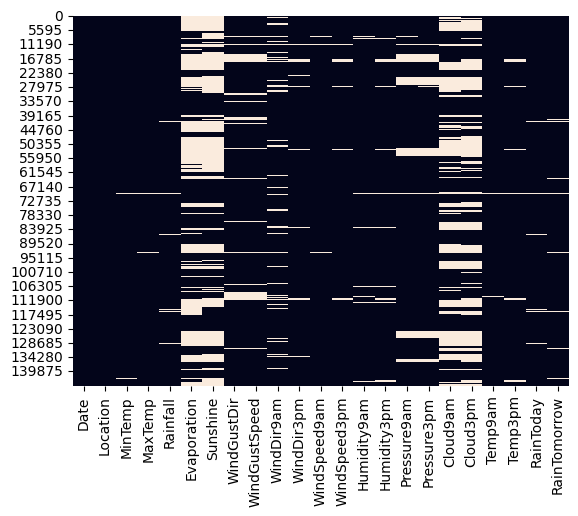

In [35]:
sns.heatmap(weather_data.isnull(), cbar=False)

In [36]:
print(f'Nro. samples: {weather_data.shape[0] }\nNro. features: {weather_data.shape[1]}')
data_type       = pd.DataFrame(weather_data.dtypes, columns=['Data Types'])
count_of_nulls  = pd.DataFrame(weather_data.isnull().sum(), columns=['Count of Nulls'])
per_of_nulls    = pd.DataFrame(weather_data.isnull().sum()*100/weather_data.shape[0] , columns=['% of Nulls'])
data_dictionary = pd.concat([data_type, count_of_nulls, per_of_nulls], axis='columns')
data_dictionary.round(1)

Nro. samples: 145460
Nro. features: 23


,Data Types,Count of Nulls,% of Nulls
Date,object,0,0.0
Location,object,0,0.0
MinTemp,float64,1485,1.0
MaxTemp,float64,1261,0.9
Rainfall,float64,3261,2.2
Evaporation,float64,62790,43.2
Sunshine,float64,69835,48.0
WindGustDir,object,10326,7.1
WindGustSpeed,float64,10263,7.1
WindDir9am,object,10566,7.3


Con base al proceso de exploracion de datos, se consideraron los siguientes aspectos:  

**Asunciones.**  
Dado que las variables Temp9am y Temp3pm presentan una alta correlación (Pearson) con MinTemp y MaxTemp se retiraron dichas variables para evitar redundancia.

**Eliminación de campos.**  
- Se eliminaron las muestras donde no existe registro de rainfall
- Se eliminaron los campos donde el porcentaje de valores nulos exceda el 30%, es decir Evaporation, Sunshine, Cloud9am y Cloud3pm

Además, dado que los problemas de clasificación requieren datos numericos de entrada, se procedió a convertir la variables categóricas a numéricas utilizando la función LabelEnconder que codifica etiquetas de una característica categórica en valores numéricos.

In [37]:
weather_data_eda = weather_data.dropna(subset=['Rainfall','RainTomorrow'])
weather_data_eda = weather_data_eda.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','Temp9am','Temp3pm'])
weather_data_eda.reset_index(drop=True, inplace=True)

print(f'Nro. samples: {weather_data_eda.shape[0] }\nNro. features: {weather_data_eda.shape[1]}')
data_type       = pd.DataFrame(weather_data_eda.dtypes, columns=['Data Types'])
count_of_nulls  = pd.DataFrame(weather_data_eda.isnull().sum(), columns=['Count of Nulls'])
per_of_nulls    = pd.DataFrame(weather_data_eda.isnull().sum()*100/weather_data_eda.shape[0] , columns=['% of Nulls'])
data_dictionary = pd.concat([data_type, count_of_nulls, per_of_nulls], axis='columns')
data_dictionary.round(1)

Nro. samples: 140787
Nro. features: 17


,Data Types,Count of Nulls,% of Nulls
Date,object,0,0.0
Location,object,0,0.0
MinTemp,float64,468,0.3
MaxTemp,float64,307,0.2
Rainfall,float64,0,0.0
WindGustDir,object,9163,6.5
WindGustSpeed,float64,9105,6.5
WindDir9am,object,9660,6.9
WindDir3pm,object,3670,2.6
WindSpeed9am,float64,1055,0.7


In [38]:
le = LabelEncoder()
weather_data_eda['Location']    = le.fit_transform(weather_data_eda['Location'].values)
weather_data_eda['WindGustDir'] = le.fit_transform(weather_data_eda['WindGustDir'].values)
weather_data_eda['WindDir9am']  = le.fit_transform(weather_data_eda['WindDir9am'].values)
weather_data_eda['WindDir3pm']  = le.fit_transform(weather_data_eda['WindDir3pm'].values)
weather_data_eda['RainToday']   = le.fit_transform(weather_data_eda['RainToday'].values)
weather_data_eda['RainTomorrow']= le.fit_transform(weather_data_eda['RainTomorrow'].values)

In [39]:
print(f'Nro. samples: {weather_data_eda.shape[0] }\nNro. features: {weather_data_eda.shape[1]}')
data_type       = pd.DataFrame(weather_data_eda.dtypes, columns=['Data Types'])
count_of_nulls  = pd.DataFrame(weather_data_eda.isnull().sum(), columns=['Count of Nulls'])
per_of_nulls    = pd.DataFrame(weather_data_eda.isnull().sum()*100/weather_data_eda.shape[0] , columns=['% of Nulls'])
data_dictionary = pd.concat([data_type, count_of_nulls, per_of_nulls], axis='columns')
data_dictionary.round(1)

Nro. samples: 140787
Nro. features: 17


,Data Types,Count of Nulls,% of Nulls
Date,object,0,0.0
Location,int64,0,0.0
MinTemp,float64,468,0.3
MaxTemp,float64,307,0.2
Rainfall,float64,0,0.0
WindGustDir,int64,0,0.0
WindGustSpeed,float64,9105,6.5
WindDir9am,int64,0,0.0
WindDir3pm,int64,0,0.0
WindSpeed9am,float64,1055,0.7


## Limpieza y relleno de datos

La data de entrada presenta registros de variables climáticas para distintas localidades en Australia para un periodo aproximadamente de diez años. Es importante notar que estas variables varian dependiendo de la estacion climática (primavera, verano, otoño e invierno) por lo cual no pueden ser evaluadas de manera general en la serie de tiempo. Entonces, la eliminación de outliers y relleno de datos de las variables continuas se realizo considerando la localidad y la temporada climática.

Los valores nulos en cada estación se reemplazaron con el promedio de la variable.

In [41]:
# Estaciones en Australia
arr_date = weather_data_eda['Date']
season   = np.zeros(weather_data_eda.shape[0])
duration = len(arr_date)

for i in range(duration):
    date  = datetime.strptime(arr_date[i], '%Y-%m-%d')
    month = date.month
    if month == 9 or month == 10 or month == 11:
        season[i] = 0 # primavera
    if month == 12 or month == 1 or month == 2:
        season[i] = 1 # verano
    if month == 3 or month == 4 or month == 5:
        season[i] = 2 # otoño
    if month == 6 or month == 7 or month == 8:
        season[i] = 3 # invierno
weather_data_eda['Season'] = season

In [45]:
list_seasons   = weather_data_eda.Season.unique()
list_locations = weather_data_eda.Location.unique()
weather_data_clean = weather_data_eda.copy()

In [46]:
def replacing_removing_outliers_avg_value(data,feature):

    clean_filled_data = np.zeros(len(data))
    avg_list = np.zeros((len(list_locations), len(list_seasons)))

    for location in list_locations:
        for season in list_seasons:
            index_season_data = np.array(data[(data['Season'] == season) & (data['Location'] == location)].index)
            season_data = np.array(data.iloc[index_season_data][feature])

            avg_value  = season_data[~np.isnan(season_data)].mean()

            q1  = np.quantile(season_data, 0.25)
            q3  = np.quantile(season_data, 0.75)
            IQR = q3-q1

            if feature != 'Rainfall':

                whisker = 1.5

                season_data = np.where(season_data > q3+whisker*IQR, avg_value,season_data)
                season_data = np.where(season_data < q1-whisker*IQR, avg_value,season_data)


            season_data[np.isnan(season_data)]   = avg_value
            clean_filled_data[index_season_data] = season_data

    return clean_filled_data

In [47]:
numerical_variables = weather_data_eda.columns[1:-3]
for feature in numerical_variables:
    print(feature)
    weather_data_clean[feature] = replacing_removing_outliers_avg_value(weather_data_eda,feature)

Location
MinTemp
MaxTemp
Rainfall
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm


/tmp/ipykernel_5779/1607519521.py:11: RuntimeWarning: Mean of empty slice.
  avg_value  = season_data[~np.isnan(season_data)].mean()
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [48]:
print(f'Nro. samples: {weather_data_clean.shape[0] }\nNro. features: {weather_data_clean.shape[1]}')
data_type       = pd.DataFrame(weather_data_clean.dtypes, columns=['Data Types'])
count_of_nulls  = pd.DataFrame(weather_data_clean.isnull().sum(), columns=['Count of Nulls'])
per_of_nulls    = pd.DataFrame(weather_data_clean.isnull().sum()*100/weather_data_clean.shape[0] , columns=['% of Nulls'])
data_dictionary = pd.concat([data_type, count_of_nulls, per_of_nulls], axis='columns')
data_dictionary.round(1)

Nro. samples: 140787
Nro. features: 18


,Data Types,Count of Nulls,% of Nulls
Date,object,0,0.0
Location,float64,0,0.0
MinTemp,float64,0,0.0
MaxTemp,float64,0,0.0
Rainfall,float64,0,0.0
WindGustDir,float64,0,0.0
WindGustSpeed,float64,5925,4.2
WindDir9am,float64,0,0.0
WindDir3pm,float64,0,0.0
WindSpeed9am,float64,0,0.0


<Axes: >

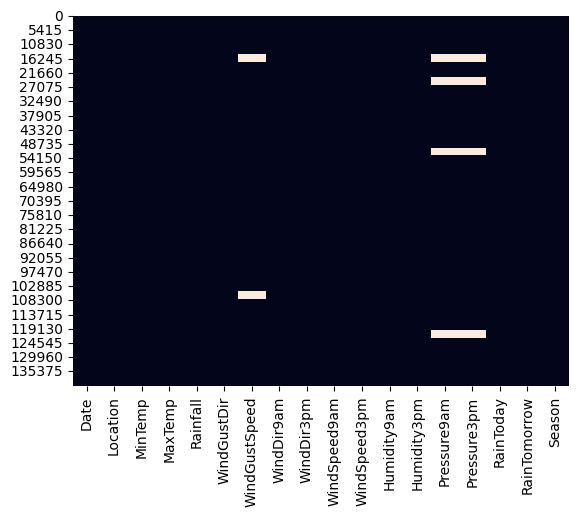

In [49]:
sns.heatmap(weather_data_clean.isnull(), cbar=False)

#### Finalmente, las muestras que continuaron con datos nulos se eliminaron

In [50]:
weather_data_clean_final = weather_data_clean.dropna()
weather_data_clean_final = weather_data_clean_final.drop(columns=['Season'])

<Axes: >

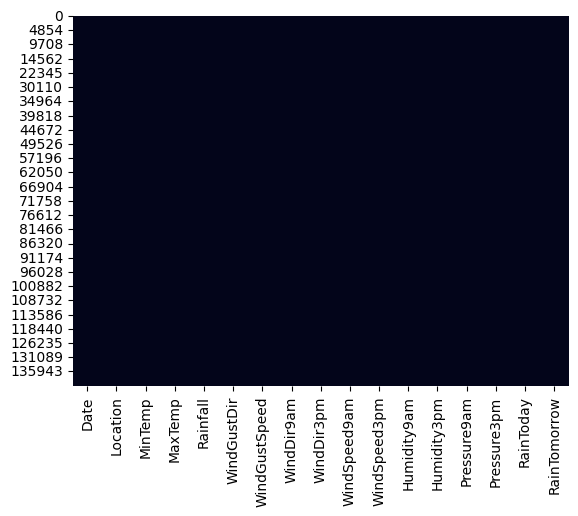

In [51]:
sns.heatmap(weather_data_clean_final.isnull(), cbar=False)

In [52]:
weather_data_clean_final

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,2008-12-01,2.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0,0
1,2008-12-02,2.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0,0
2,2008-12-03,2.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0,0
3,2008-12-04,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0,0
4,2008-12-05,2.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0,0
140783,2017-06-21,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0,0
140784,2017-06-22,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0,0
140785,2017-06-23,41.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0,0


 ### Finalmente se graficaron los boxplots para descartar valores atípicos

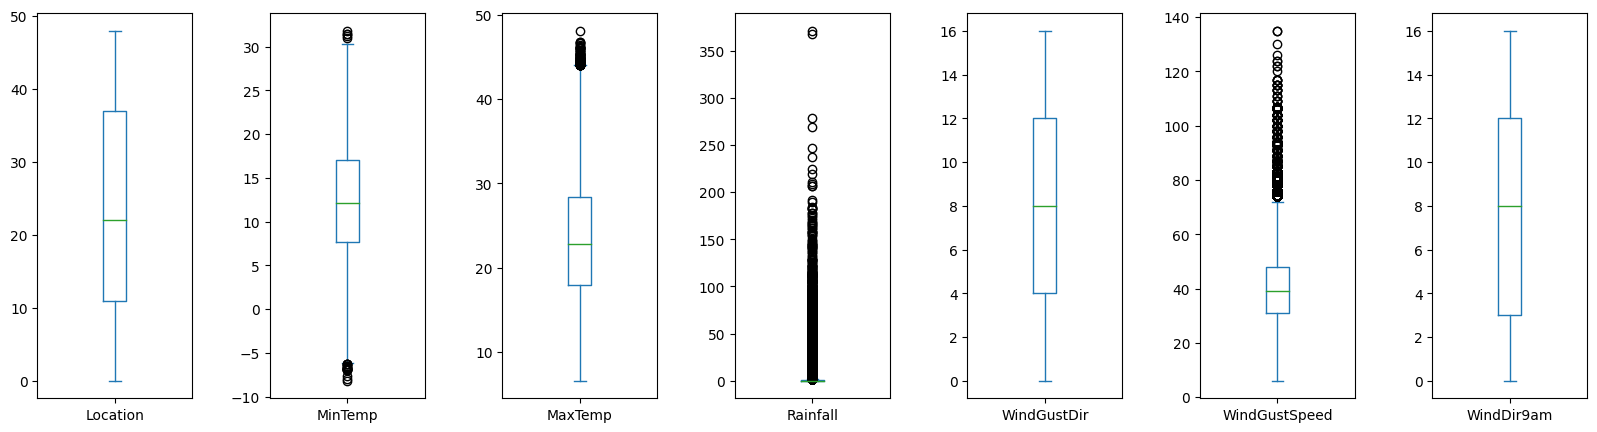

In [53]:
weather_data_clean_final.iloc[:,:8].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,5)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

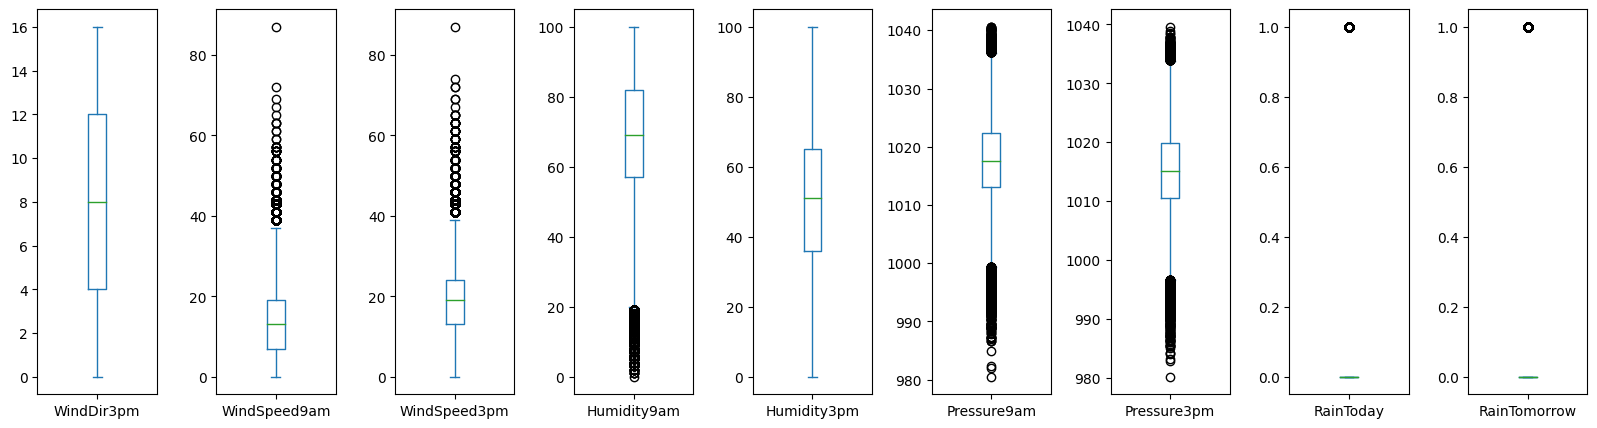

In [54]:
weather_data_clean_final.iloc[:,8:].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,5)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
weather_data_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126194 entries, 0 to 140786
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           126194 non-null  object 
 1   Location       126194 non-null  float64
 2   MinTemp        126194 non-null  float64
 3   MaxTemp        126194 non-null  float64
 4   Rainfall       126194 non-null  float64
 5   WindGustDir    126194 non-null  float64
 6   WindGustSpeed  126194 non-null  float64
 7   WindDir9am     126194 non-null  float64
 8   WindDir3pm     126194 non-null  float64
 9   WindSpeed9am   126194 non-null  float64
 10  WindSpeed3pm   126194 non-null  float64
 11  Humidity9am    126194 non-null  float64
 12  Humidity3pm    126194 non-null  float64
 13  Pressure9am    126194 non-null  float64
 14  Pressure3pm    126194 non-null  float64
 15  RainToday      126194 non-null  int64  
 16  RainTomorrow   126194 non-null  int64  
dtypes: float64(14), int64(2), obj

In [55]:
weather_data_clean_final.iloc[:,1:].to_csv('weatherAUS_ML.csv', index=False)